<a href="https://colab.research.google.com/github/tathi-martins/Alura-Bootcamp---Ci-ncia-de-Dados-Aplicada-2/blob/main/Super_Desafio_do_M%C3%B3dulo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import matplotlib._color_data as mcd
from matplotlib import colors as mcolors
import locale

#**Super Desafio: Escolha outro valor fora o valor aprovado no TABNET e explore estes dados.**

In [ ]:
dados_taxa_mortalidade = pd.read_csv('/content/Taxa mortalidade Morb CID-10.csv', encoding='ISO 8859-1', skiprows=5, skipfooter=7, sep = ';', thousands='.', decimal=',')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [ ]:
dados_obitos = pd.read_csv('/content/obitos_lista_morbidade_CID-10.csv', encoding='ISO 8859-1', skiprows=5, skipfooter=6, sep = ';', thousands='.', decimal=',')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [ ]:
dados_obitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Columns: 169 entries, Lista Morb  CID-10 to Total
dtypes: int64(87), object(82)
memory usage: 29.2+ KB


In [ ]:
colunas_usaveis = dados_obitos.mean().index.tolist() # Transforma a linha que contém os meses em index e os coloca/transforma em uma lista (listas são mutáveis, index não são)
colunas_usaveis.insert(0, 'Lista Morb  CID-10')

usaveis = dados_obitos[colunas_usaveis]

#Transformando a coluna 'Unidade da Federação' em índice, desta forma, eliminando o índice numérico (que vai de 0 até 26).
usaveis = usaveis.set_index('Lista Morb  CID-10')

#Ordenando os gastos do mais alto ao mais baixo (quem gastou mais):
doencas_que_mataram_mais = usaveis.sort_values('Total', ascending=False)  # sort_values por padrão ordena do mais baixo ao mais alto, ascending=False ordena do mais alto ao mais baixo.
doencas_que_mataram_mais = doencas_que_mataram_mais.drop('Total', axis=0) # Retirando a linha Total

# *********************************************************

# Tratamento dos dados do Dataframe dados_taxa_mortalidade
colunas_usaveis_taxa_mortalidade = dados_taxa_mortalidade.mean().index.tolist() # Transforma a linha que contém os meses em index e os coloca/transforma em uma lista (listas são mutáveis, index não são)
colunas_usaveis_taxa_mortalidade.insert(0, 'Lista Morb  CID-10')

usaveis_taxa_mortalidade = dados_taxa_mortalidade[colunas_usaveis_taxa_mortalidade]

#Transformando a coluna 'Unidade da Federação' em índice, desta forma, eliminando o índice numérico (que vai de 0 até 26).
usaveis_taxa_mortalidade = usaveis_taxa_mortalidade.set_index('Lista Morb  CID-10')

#Ordenando os gastos do mais alto ao mais baixo (quem gastou mais):
doencas_que_mataram_mais_taxa_mortalidade = usaveis_taxa_mortalidade.sort_values('Total', ascending=False)  # sort_values por padrão ordena do mais baixo ao mais alto, ascending=False ordena do mais alto ao mais baixo.
doencas_que_mataram_mais_taxa_mortalidade = doencas_que_mataram_mais_taxa_mortalidade.drop('Total', axis=1) # Retirando a coluna Total

#**1.1 - Informações Iniciais**

Este é uma análise baseada nos bancos de dados do Ministério da Saúde (Sistema de Informações Hospitalares do SUS (SIH/SUS)) do Brasil, para verificarmos se houve um aumento no número de mortes por doenças cardiovasculares causado pela pandemia de COVID-19 no Brasil, seja consequência do colapso do sistema de saúde no país gerado por ela ou por complicações causadas pela doença nas pessoas com comorbidades no aparelho circulatório. 

O dataframe utilizado contém dados de fevereiro de 2007, até março de 2021. As linhas são as doenças do aparelho circulatório, mais a linha Total, e as colunas são os meses e anos em que os óbitos ocorreram, mais uma coluna Total, os dados foram computados e separados por mês/atendimento e não por mês/processamento.

O dataframe também possui vários dados do tipo NaN, o que interfere bastante nas análises feitas porque as informações não estão completas. Para isso fiz uma média dos meses por cada linha para homogeneizar o drataframe e no processo eliminar as dados em brancno, como aprendemos em aula neste módulo 01.

#Vamos começar pelo panorama geral. Quais são essas doenças classificadas como do aparelho cardiovascular?



In [ ]:
# Conferindo o total de óbitos
coluna_total = doencas_que_mataram_mais.columns[-1]
total_obitos = doencas_que_mataram_mais[coluna_total]
total_obitos = total_obitos / 100
total_obitos

Lista Morb  CID-10
09 Doenças do aparelho circulatório                   11775.53
.. Insuficiência cardíaca                              3007.65
.. Acid vascular cerebr não espec hemorrág ou isq      2888.27
.. Infarto agudo do miocárdio                          1466.50
.. Hemorragia intracraniana                             941.01
.. Transtornos de condução e arritmias cardíacas        744.06
.. Outras doenças isquêmicas do coração                 520.76
.. Outras doenças do coração                            396.20
.. Infarto cerebral                                     375.47
.. Outras doenças das artérias arteríolas e capil       260.31
.. Embolia e trombose arteriais                         228.76
.. Embolia pulmonar                                     185.66
.. Outras doenças cerebrovasculares                     172.76
.. Hipertensão essencial (primária)                     148.36
.. Flebite tromboflebite embolia e trombose venosa      127.11
.. Arteroesclerose                  

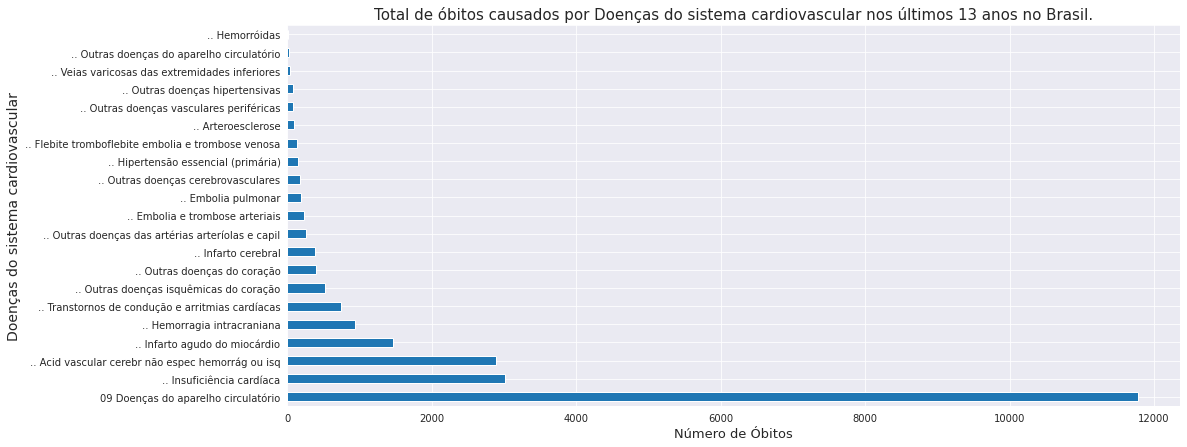

In [ ]:
# Criando o gráfico
ax = total_obitos.plot(kind='barh', figsize=(16,7))

# Criando o estilo da grade do gráfico
sns.set_style('darkgrid')

# Criando o título
plt.title('Total de óbitos causados por Doenças do sistema cardiovascular nos últimos 13 anos no Brasil.', fontsize='15')

# Criando os labels
plt.xlabel('Número de Óbitos', fontsize=13)
plt.ylabel('Doenças do sistema cardiovascular', fontsize=14)

plt.show() 

# Nota: Colocar as doenças no eixo y e as mortes no eixo x

Nota: Doenças do Sistema Circulatório parece ser o compilado de todas as mortes de origem no aparelho cardiovascular de forma geral, provavelmente foram registradas assim para situações em que o atestado de óbito não especifica qual a doença do aparelho cardiovascular o paciente veio a falecer.

Esta é minha hipótese, já que os termos "doenças do aparelho circulatório" ou "doenças do sistema cardiovascular" abrange exatamente as mesmas enfermidades listadas no dataframe, mas é uma classificação usada pelos especialistas para classificar de forma genérica doenças do coração e sistema circulatório. Fontes: [1](https://www.news-medical.net/health/What-is-Cardiovascular-Disease-(Portuguese).aspx) e [2](https://pt.khanacademy.org/science/health-and-medicine/circulatory-system-diseases).

#Quais são as doenças do coração que mais mataram nos últimos 15 anos?

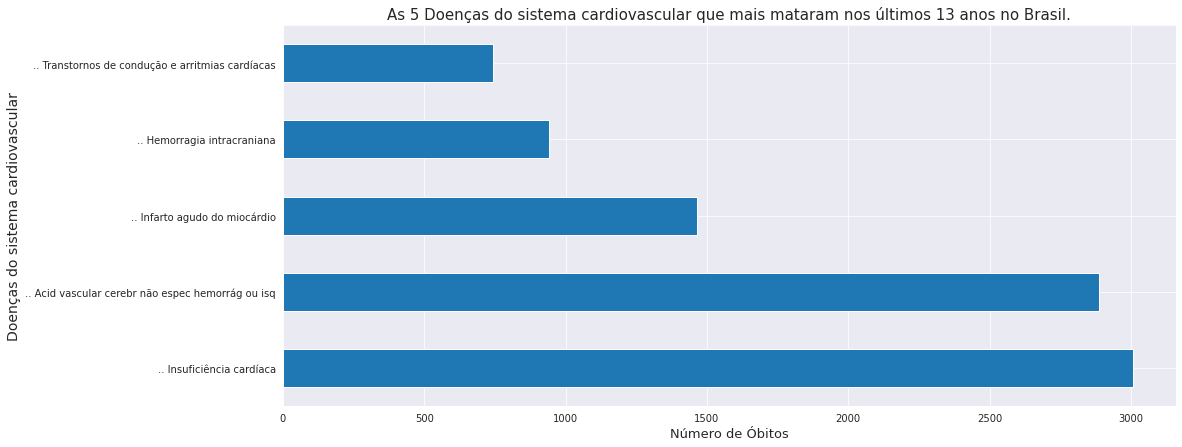

In [ ]:
# Criando o gráfico
total_obitos[1:].head().plot(kind='barh', figsize=(16,7))

# Criando o estilo da grade do gráfico
sns.set_style('darkgrid')

# Criando o título
plt.title('As 5 Doenças do sistema cardiovascular que mais mataram nos últimos 13 anos no Brasil.', fontsize='15')

# Criando os labels
plt.xlabel('Número de Óbitos', fontsize=13)
plt.ylabel('Doenças do sistema cardiovascular', fontsize=14)

plt.show()

Criando o gráfico para analisar se as mortes por doenças cardio-vasculares (top 5) cresceram nos últimos cinco anos ou se se mantiveram estáveis.

In [ ]:
# este dataset é sem a coluna Total
top_5_mais_matam = doencas_que_mataram_mais.head()
top_5_mais_matam = top_5_mais_matam.drop('Total', axis=1) # Retirando a coluna Total

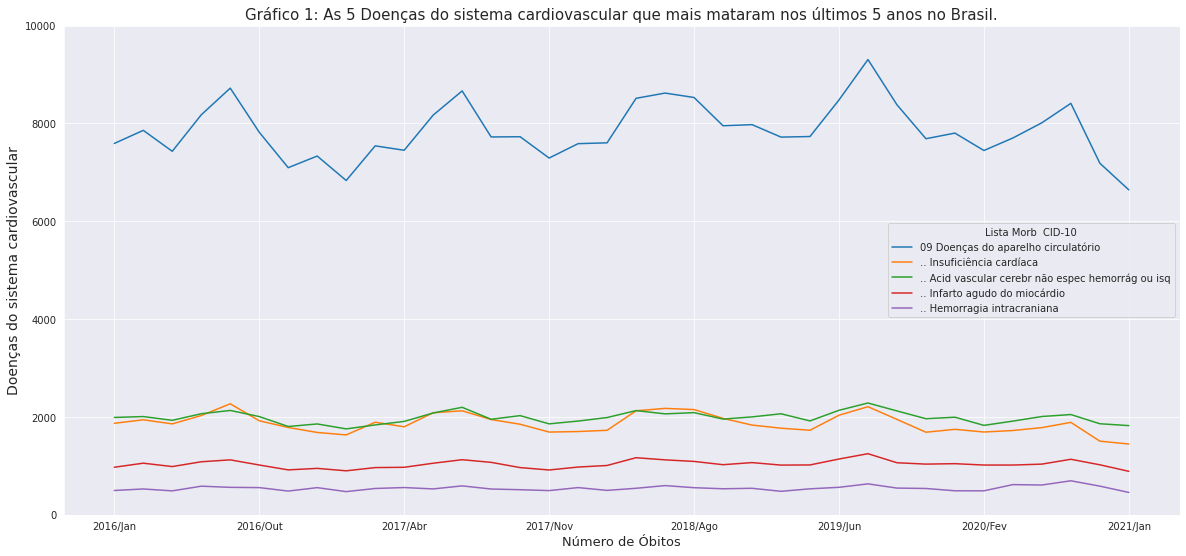

In [ ]:
ultimos_5_anos_top5 = top_5_mais_matam.iloc[:, 50:]
ultimos_5_anos_top5.T.plot(figsize=(20,9))
plt.ylim(bottom=0, top=10000)

# Criando o estilo da grade do gráfico
sns.set_style('darkgrid')

# Criando o título
plt.title('Gráfico 1: As 5 Doenças do sistema cardiovascular que mais mataram nos últimos 5 anos no Brasil.', fontsize='15')

# Criando os labels
plt.xlabel('Número de Óbitos', fontsize=13)
plt.ylabel('Doenças do sistema cardiovascular', fontsize=14)

plt.show()

No Gráfico 1 acima podemos ver pequenas variações em número de fatalidades quando analisamos as doenças isoladamente, os números se mantém estáveis ao longo dos anos. Porém, há variações mais acentuadas quando analisamos os óbitos de forma combinada sob a classificação geral de 'Doenças do aparelho circulatório'. Mas mesmo com tantas variações no curto prazo, no longo prazo não há nenhuma tendência de subida no número de fatalidades.

Também podemos perceber que a Insuficiência cardíaca e Acidente vascular cerebral, 1º e 2ª doenças cardiovasculares que mais matam no Brasil respectivamente, estão bem próximos um do outro em valores absolutos no número de mortes, há momentos em que AVC supera insuficiência cardíaca ou em que estas duas doenças empatam.

#Em seguida, vamos comparar os anos de 2019 com 2020 para ver se a pandemia contribuiu para o aumento de óbitos em casos de doenças cardio-vasculares.

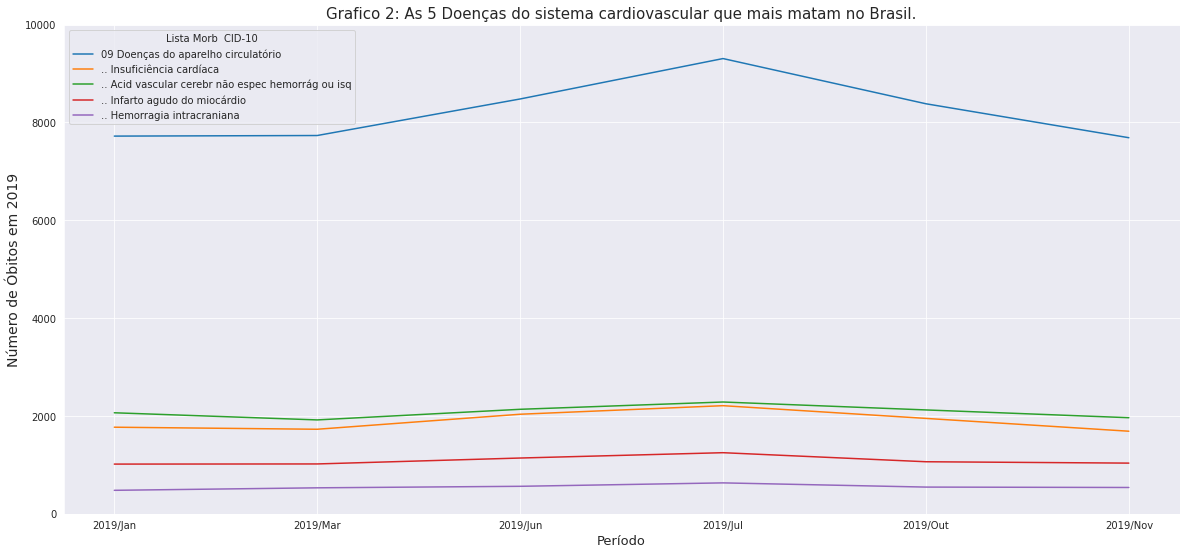

In [ ]:
ultimos_5_anos_top5 = top_5_mais_matam.iloc[:, 73:79]
ultimos_5_anos_top5.T.plot(figsize=(20,9))
plt.ylim(bottom=0, top=10000)

# Criando o estilo da grade do gráfico
sns.set_style('darkgrid')

# Criando o título
plt.title('Grafico 2: As 5 Doenças do sistema cardiovascular que mais matam no Brasil.', fontsize='15')

# Criando os labels
plt.xlabel('Período', fontsize=13)
plt.ylabel('Número de Óbitos em 2019', fontsize=14)

plt.show()

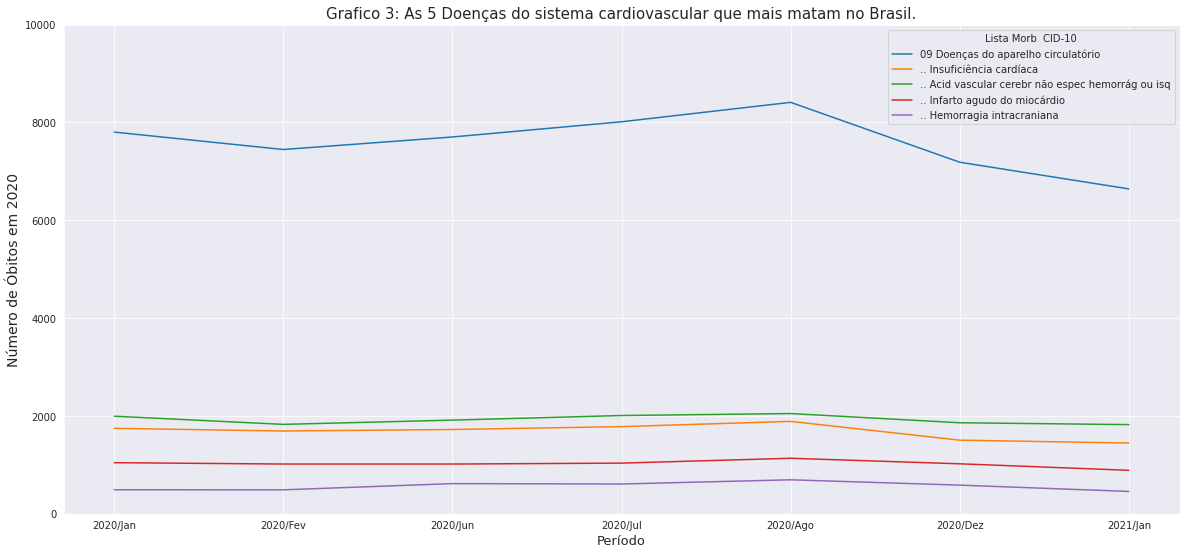

In [ ]:
ultimos_5_anos_top5 = top_5_mais_matam.iloc[:, 79:]
ultimos_5_anos_top5.T.plot(figsize=(20,9))
plt.ylim(bottom=0, top=10000)

# Criando o título
plt.title('Grafico 3: As 5 Doenças do sistema cardiovascular que mais matam no Brasil.', fontsize='15')

# Criando os labels
plt.xlabel('Período', fontsize=13)
plt.ylabel('Número de Óbitos em 2020', fontsize=14)

plt.show()

Ao observamos os anos 2019 e 2020 mais detalhadamente, não vemos nenhuma mudança significativa no número de óbitos, ou seja, não há nenhum crescimento acentuado no número de fatalidades por doenças do aparelho circulatório no período da pandemia, não há, pelo menos de forma aparente, nenhuma correlação entre as consequencias da pandemia no sistema de saúde brasileiro e um aumento no números de mortes por doenças cardiovasculares no Brasil.

Apesar de vermos um crescimento de óbitos em agosto de 2020, em julho de 2019 o pico de mortes foi muito maior, quando não havia nenhum registro de casos por COVID-19 no Brasil. Portanto, os dados ainda estão inconclusivos, é possível que seja causado por dados incompletos do dataframe.

#Vamos analisar agora as taxas de mortalidade no Brasil.

**Taxa de mortalidade:** Esse indicador representa o número de óbitos ocorridos em um determinado período. Essa taxa é calculada a cada mil habitantes e reflete a relação entre o número de mortos no período analisado e a população total de um determinado lugar.

**Como é feito o cálculo da taxa de mortalidade?**

O coeficiente geral de mortalidade, ou taxa de mortalidade geral, refere-se a toda população e não ao total de óbitos. É calculado dividindo-se o total de óbitos, em determinado período, pela população estimada para a metade do mesmo período.

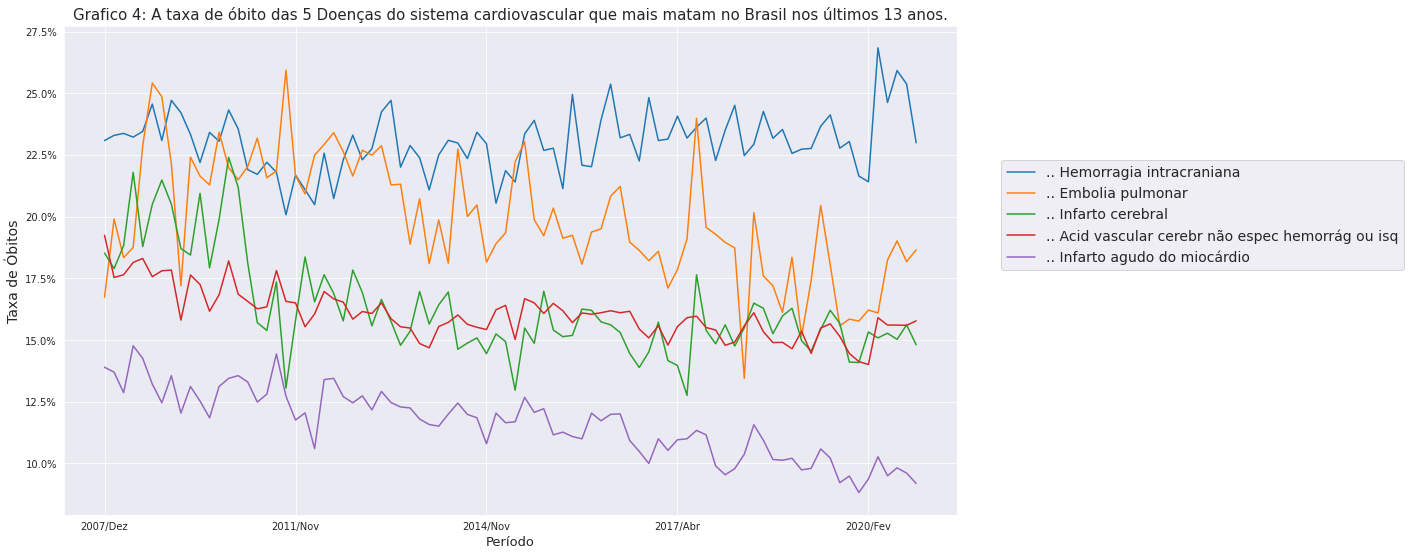

In [ ]:
taxa_mortalidade = doencas_que_mataram_mais_taxa_mortalidade.head()
ax = taxa_mortalidade.T.plot(figsize=(16,9))

# Criando o estilo da grade do gráfico
sns.set_style('darkgrid')

# Criando o título
plt.title('Grafico 4: A taxa de óbito das 5 Doenças do sistema cardiovascular que mais matam no Brasil nos últimos 13 anos.', fontsize='15')

# Criando os labels
plt.xlabel('Período', fontsize=13)
plt.ylabel('Taxa de Óbitos', fontsize=14)

# Configuração do eixo y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x}%'))

# Criando legendas
plt.legend(fontsize='14', loc=(1.05, 0.5)) # Coloca a legenda do lado de fora do gráfico

plt.show()


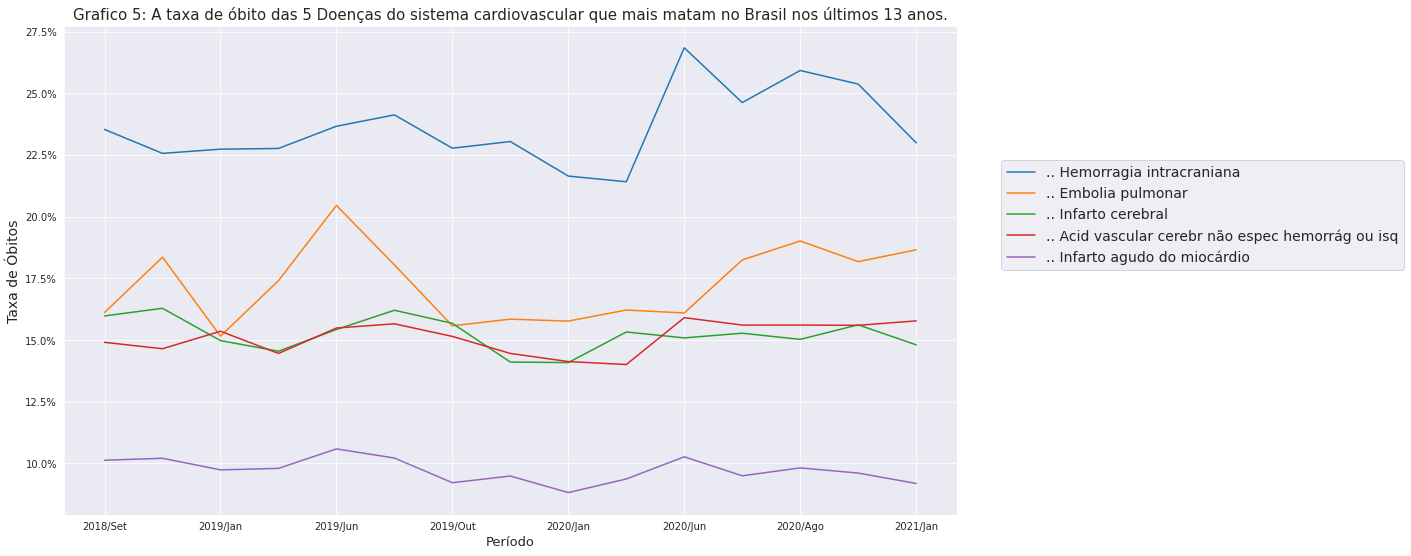

In [126]:
taxa_mortalidade_2020 = doencas_que_mataram_mais_taxa_mortalidade.iloc[:, 71:].head()
ax = taxa_mortalidade_2020.T.plot(figsize=(16,9))

# Criando o estilo da grade do gráfico
sns.set_style('darkgrid')

# Criando o título
plt.title('Grafico 5: A taxa de óbito das 5 Doenças do sistema cardiovascular que mais matam no Brasil nos últimos 13 anos.', fontsize='15')

# Criando os labels
plt.xlabel('Período', fontsize=13)
plt.ylabel('Taxa de Óbitos', fontsize=14)

# Configuração do eixo y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x}%'))

# Criando legendas
plt.legend(fontsize='14', loc=(1.05, 0.5)) # Coloca a legenda do lado de fora do gráfico

plt.show()

Quando observamos os dois gráficos de taxa de mortalidade de doenças cardiovasculares observamos logo de cara que o crescimento nas taxas de mortalidade correspondem com os mesmos períodos observados nos gráficos de valores absolutos (2019/Jun e 2020/Ago). Porém as 5 doenças que mais mataram não são todas as mesmas do gráfico dos valores absolutos e também não estão na mesma ordem. Um ponto bem interessante de se observar. 

Porque este fenômeno ocorreu? Foi um problema de mineração e tratamento dos dados? Ou será que este dataframe está mais completo do que o de valores absolutos por isto a diferença nos resultados? Não sei dizer, será necessário mais conhecimento e estudos nesta área do que que eu possuo no momento para descobrir.

**Conclusões Finais**

De acordo com cartórios de registro civil, houve um aumento de 31% no número de mortes por doenças cardiovasculares entre 16 de março, quando os estados começaram a decretar a quarentena por causa da pandemia da covid-19, a 31 de maio, em comparação com o mesmo período de 2019. Os dados fazem parte do novo módulo do  [Portal da Transparência](https://transparencia.registrocivil.org.br/especial-covid), que reúne os óbitos por doenças cardíacas. O módulo foi desenvolvido pela Associação Nacional dos Registradores de Pessoas Naturais (Arpen-Brasil) em parceria com a Sociedade Brasileira de Cardiologia (SBC). [Fonte.](https://agenciabrasil.ebc.com.br/geral/noticia/2020-06/cartorios-registram-aumento-nas-mortes-por-doencas-cardiovasculares)

O levantamento da SBC mostra uma queda de 14% e 5% no número de mortes por infarto e AVC, no mesmo período analisado. Na opinião de Marcelo Queiroga, presidente da SBC, esta queda pode estar diretamente relacionada ao aumento do número de mortes em domicílio e à dificuldade do diagnóstico exato.

“A forte correlação positiva entre o aumento de mortes cardiovasculares por causas inespecíficas e domiciliares corrobora essas explicações, pois pode sugerir que pelo menos algumas das mortes por infarto e AVC ocorreram em casa, impedindo o diagnóstico correto”, disse Queiroga.

Na mesma reportagem, Ricardo Costa, o presidente da Sociedade Brasileira de Hemodinâmica e Cardiologia Intervencionista, disse que na segunda quinzena de março, quando as medidas de isolamento social foram implantadas de maneira mais ampla, foi observada uma redução em torno de 50% na realização de procedimentos de emergência como a angioplastia.

“Nas primeiras semanas de abril, observamos uma redução em torno de 70%. A principal hipótese é que pacientes mesmo com sintomas de infarto estavam deixando de procurar atendimento médico de emergência por conta do receio de serem contaminados pelo novo coronavírus”, disse Costa, destacando que muitos pacientes acabavam morrendo em casa ou chegavam com um quadro cardíaco grave no atendimento.

Também houve um aumento de 132% no número de mortes por doenças cardiovasculares em todo o ano de 2020 comparado com as mortes de 2019 de acordo com estas duas reportagens, [1](https://www.uniftc.edu.br/mortes-por-doencas-cardiovasculares-aumentam-ate-132-no-brasil-durante-a-pandemia/) e [2](https://www.cnnbrasil.com.br/saude/2021/01/28/mortes-por-doencas-cardiovasculares-crescem-ate-132-na-pandemia) ambas citam o mesmo estudo como fonte para seus artigos: [Excess of cardiovascular deaths during the COVID-19 pandemic in Brazilian capital cities.](https://heart.bmj.com/content/106/24/1898)

Segundo o estudo, além dos óbitos causados diretamente pela doença, a Covid-19 também é apontada como responsável pelo aumento de mortes entre pessoas com doenças cardiovasculares. As mortes por doenças cardiovasculares não especificadas, infartos e AVCs (Acidentes Vasculares Cerebrais) chegaram a aumentar em 132% em Manaus, 126% em Belém, 87% em Fortaleza, 71% em Recife, 38% no Rio de Janeiro e 31% em São Paulo. A pesquisa comparou dados de 2019 e 2020.

Na Bahia, um levantamento realizado pela Santa Casa de Misericórdia de Feira de Santana, revelou que apenas 30 consultas cardiológicas foram realizadas  entre março e abril de 2020.  No mesmo período do ano de 2019, a quantidade alcançou o número de 379 consultas, uma redução de 90% nos atendimentos preventivos. O levantamento constatou ainda que a rotina dos atendimentos na unidade hospitalar teve redução de 84% na realização dos testes ergométricos e a procura por exames como Eletrocardiograma e Ecocardiograma diminuiu em 94% e 81%, respectivamente.

A hipótese levantada pelos cientistas do estudo são as mesmas de Marcelo Queiroga e Ricardo Costa, medo de se expor ao novo coronavírus, mesmo com sintomas ou mesmo diagnósticos de doenças cardiovasculares as pessoas não estejam buscando atendimento médico. A redução nas internações hospitalares é de 15% e os procedimentos e cirurgias caíram 45% e 44%, respectivamente. Sem o acompanhamento adequado, esses pacientes evoluem para quadros mais graves e têm mais riscos de morte.  

 Há mais estudos sobre o tema:

[Estatística Cardiovascular – Brasil 2020](https://www.scielo.br/j/abc/a/DBcdvZJs8v7JFG95RNnHrjv/?lang=pt)

**Conclusão:** Quando lemos estes estudos sobre o aumento de mortes causadas por doenças cardiovasculares, podemos notar o uso de várias fontes que vão muito além do DATASUS e TABNET. O que mais uma vez confirma a hipótese de que os dados nesses banco de dados do Ministério da Saúde estão incompletos e não chegam a mostrar a realidade da situação dos óbitos de doenças do sistema circulatório. O que traz uma preocupação se isso pode impactar nas políticas de combate, prevenção e tratamento de doenças cardíacas pelos governos federais, estaduais e municipais, uma vez que eles podem utilizar estes dados como base para planejar políticas públicas de combate, prevenção e tratamento a essas doenças.